In [3]:
from google.colab import files
uploaded = files.upload()

Saving Real_Combine.csv to Real_Combine (1).csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv("Real_Combine.csv")

In [6]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
#To deal with The missing Values.

In [7]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
for feature in features_with_nan:
  print(feature, np.round(df[feature].isnull().mean(), 4),'% missing values')


PM 2.5 0.0009 % missing values


In [15]:
mean=df['PM 2.5'].mean() 
df=df.replace(0,mean)
df=df.fillna(mean)


df[df['PM 2.5'].isnull()]


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5


In [16]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

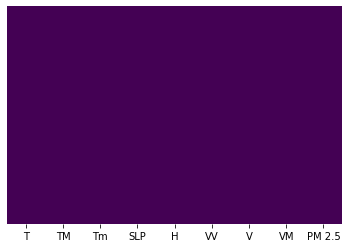

In [18]:
#To visaulize the missing Values.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
#Dividing The Target Variables and Features
X=df.iloc[:,:-1] #To Independent  Variables
y=df.iloc[:,-1] #To dependent Variables
# np.isnan(X)
# np.where(np.isnan(X))
# np.where(np.isnan(y))
# np.nan_to_num(y)
# np.where(np.isnan(y))


# y.fillna(104)
z = y.fillna(104)
# y.isnull().sum()
z.isnull().sum()

0

In [21]:
#To check for the Corelationg in the dataSets
corr_matrix = df.corr()
corr_matrix['PM 2.5'].sort_values(ascending=False)

PM 2.5    1.000000
SLP       0.657388
H         0.227889
VM       -0.369880
V        -0.435778
Tm       -0.485611
TM       -0.586137
T        -0.650543
VV       -0.701420
Name: PM 2.5, dtype: float64

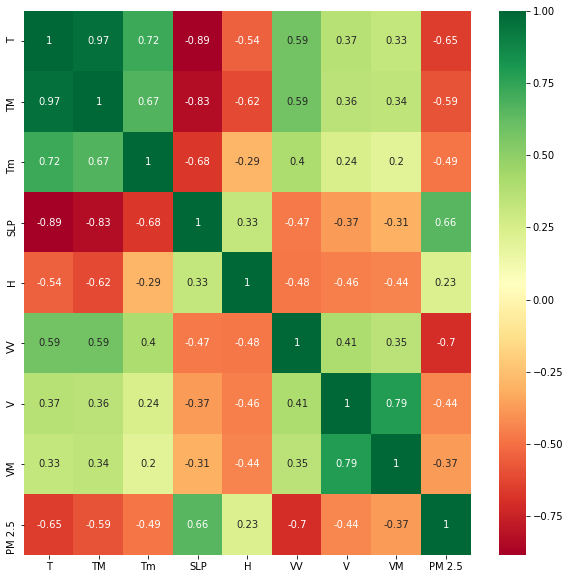

In [22]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Most important thing is the Feature Selection of the Data.
#Techinque to get the Importance of Each and Every Feauture.

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,z)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [24]:
print(model.feature_importances_)

[0.14093532 0.0767281  0.084488   0.17968245 0.05542552 0.37839586
 0.04302031 0.04132443]


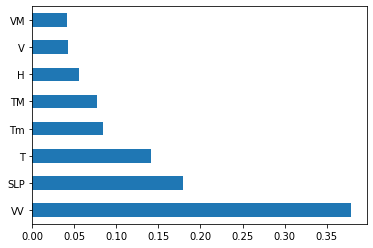

In [25]:
#To decide the Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

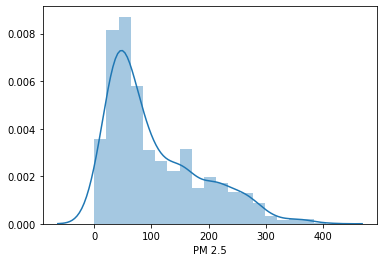

In [ ]:
sns.distplot(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Model Selection

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
#Hyperparameter Tuning is applied in the Data
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [30]:

random_grid={
            'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
}

In [31]:
#Applying the Model selection after the hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor
RandomForest= RandomForestRegressor()

In [32]:
rf_random=RandomizedSearchCV(estimator = RandomForest, param_distributions = random_grid,scoring='neg_mean_squared_error',
                             n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [34]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.6s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [37]:
#Our prediction on the Test Data
y_pred=rf_random.predict(X_test)

In [49]:
y_pred

array([158.42697984,  84.60124541, 193.9708493 ,  29.34804965,
       192.34339842,  62.99030521, 222.31792738,  88.78870978,
        65.44315285,  49.54327041,  41.71498264,  91.76686127,
        41.76155071,  39.88045096,  25.78236782,  78.85649908,
        20.56811407, 210.99900254,  76.32339208,  71.81389509,
        64.43197528,  22.29178447, 213.78279854,  44.82111192,
       132.11800728,  54.05744641, 174.73536678,  79.05253583,
        34.68740236,  64.43758109,  41.71498264,  35.50585433,
        34.68740236, 154.64567737,  39.9481759 ,  67.49238296,
        76.23355588, 108.37475354, 156.80901996,  39.88045096,
        85.81310218,  77.0648727 , 122.31834345, 158.92593197,
       158.54515766, 219.29645273,  71.97465642, 356.96897917,
       202.2252244 ,  48.66222592, 218.48413493,  54.35036066,
        96.6852781 ,  55.18950408,  78.71213355,  64.69455883,
        29.35403486, 150.02920863,  82.15444486,  76.23355588,
        51.25478506,  48.53192554,  62.87074598, 213.09

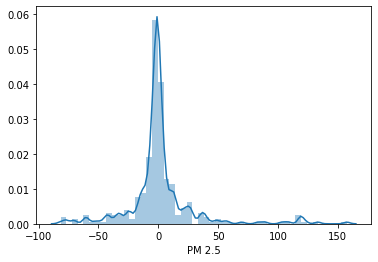

In [50]:
sns.distplot(y_test-y_pred)

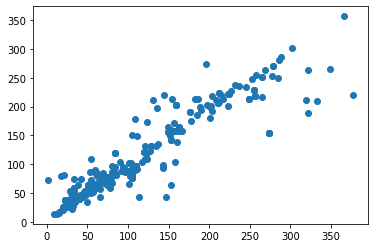

In [40]:
#check the Prediction in the Scatter Matrix form also.

plt.scatter(y_test,y_pred)